In [29]:
import json

# Passe den Dateipfad entsprechend an
file_path = '/home/mmo-cya/dpsim/python/src/dpsim/Config_IEEE14.json'
#file_path = "/home/mmo-cya/dpsim/python/src/dpsim/Config_CIGRE_LineDisconnection.json"
#file_path = "/home/mmo-cya/dpsim/python/src/dpsim/Config_IEEE14_LD.json"

try:
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        print(json.dumps(data, indent=4))
except FileNotFoundError:
    print(f"Die Datei '{file_path}' wurde nicht gefunden.")
except json.JSONDecodeError:
    print(f"Die Datei '{file_path}' ist keine gültige JSON-Datei.")



{
    "CIMFiles": [
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/IEEE14/19700101T0000Z_XX_YYY_DL_.xml",
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/IEEE14/19700101T0000Z_XX_YYY_SV_.xml",
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/IEEE14/19700101T0000Z_XX_YYY_TP_.xml",
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/IEEE14/19700101T0000Z_YYY_EQ_.xml",
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/IEEE14/19700101T0000Z_XX_YYY_SSH_.xml",
        "/home/mmo-cya/cimpy/cimpy/examples/sampledata/IEEE14/19700101T0000Z_XX_YYY_DY_.xml"
    ],
    "SolverParameters": {
        "Domain": "RMS",
        "Solver": "MNA"
    },
    "SimulationParameters": {
        "SimulationName": "IEEE14_TPF",
        "StartTime": 0,
        "EndTime": 1.5,
        "TimeStep": 0.1,
        "InitFromPF": true
    },
    "Events": {
        "EventType": "ThreePhaseFault",
        "EventStartTime": 0,
        "EventEndTime": 10,
        "EventParameters": {
           

CIM object Diagram created : 1 times
CIM object DiagramObjectPoint created : 168 times
CIM object DiagramObject created : 77 times
CIM object SvPowerFlow created : 16 times
CIM object SvVoltage created : 14 times
CIM object SvTapStep created : 5 times
CIM object TopologicalIsland created : 1 times
CIM object TopologicalNode created : 14 times
CIM object VoltageLimit created : 14 times
CIM object Terminal created : 58 times
CIM object VoltageLevel created : 14 times
CIM object OperationalLimitSet created : 56 times
CIM object PowerTransformer created : 5 times
CIM object ConformLoad created : 11 times
CIM object SubGeographicalRegion created : 1 times
CIM object RegulatingControl created : 5 times
CIM object BaseVoltage created : 4 times
CIM object PowerTransformerEnd created : 10 times
CIM object CurrentLimit created : 42 times
CIM object LoadArea created : 1 times
CIM object ConformLoadGroup created : 1 times
CIM object OperationalLimitType created : 2 times
CIM object RatioTapChanger

[12:40:33.147720 IEEE14_TPF_PF info] Initialize simulation: IEEE14_TPF_PF
[12:40:33.148613 IEEE14_TPF_PF_PF_Solver warning] Unable to get base voltage at Bus_0010
[12:40:33.148625 IEEE14_TPF_PF_PF_Solver warning] Unable to get base voltage at Bus_0014
[12:40:33.148632 IEEE14_TPF_PF_PF_Solver warning] Unable to get base voltage at Bus_0011
[12:40:33.148639 IEEE14_TPF_PF_PF_Solver warning] Unable to get base voltage at Bus_0002
[12:40:33.148664 IEEE14_TPF_PF_PF_Solver warning] Unable to get base voltage at Bus_0012
[12:40:33.148671 IEEE14_TPF_PF_PF_Solver warning] Unable to get base voltage at Bus_0003
[12:40:33.148678 IEEE14_TPF_PF_PF_Solver warning] Unable to get base voltage at Bus_0013
[12:40:33.149320 IEEE14_TPF_PF info] Scheduling tasks.
[12:40:33.149998 IEEE14_TPF_PF info] Scheduling done.
[12:40:33.150002 IEEE14_TPF_PF info] Opening interfaces.
[12:40:33.150003 IEEE14_TPF_PF info] Start synchronization with remotes on interfaces
[12:40:33.150005 IEEE14_TPF_PF info] Synchronized s

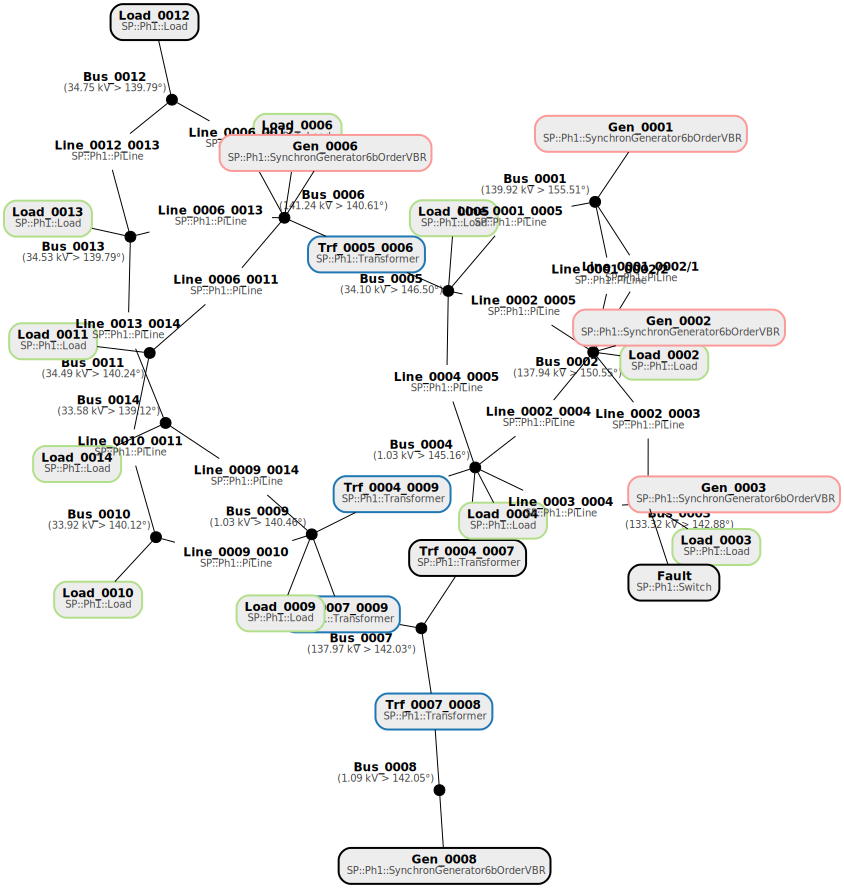

1.000000e+00: Handle event time


[12:40:33.236742 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[12:40:33.247818 IEEE14_TPF_Solver warning] Linear solver configuration is not used!
[12:40:33.253503 IEEE14_TPF info] Scheduling tasks.
[12:40:33.254859 IEEE14_TPF info] Scheduling done.
[12:40:33.254863 IEEE14_TPF info] Opening interfaces.
[12:40:33.254866 IEEE14_TPF info] Start synchronization with remotes on interfaces
[12:40:33.254868 IEEE14_TPF info] Synchronized simulation start with remotes
[12:40:33.254870 IEEE14_TPF info] Start simulation: IEEE14_TPF
[12:40:33.254874 IEEE14_TPF info] Time step: 1.000000e-01
[12:40:33.254877 IEEE14_TPF info] Final time: 1.500000e+00
[12:40:33.280930 IEEE14_TPF info] Simulation calculation time: 0.025963
[12:40:33.281010 IEEE14_TPF info] Simulation finished.


1.100000e+00: Handle event time


In [30]:
from DPsimLauncher import DPsimLauncher

DPsimLauncher(file_path)


In [31]:
import cimpy
from cimpy import CIM2DPsim
from cimpy.CIM2DPsim import Domain

imported_result = cimpy.cim_import(data['CIMFiles'], 'cgmes_v2_4_15')

CIM object Diagram created : 1 times
CIM object DiagramObjectPoint created : 168 times
CIM object DiagramObject created : 77 times
CIM object SvPowerFlow created : 16 times
CIM object SvVoltage created : 14 times
CIM object SvTapStep created : 5 times
CIM object TopologicalIsland created : 1 times
CIM object TopologicalNode created : 14 times
CIM object VoltageLimit created : 14 times
CIM object Terminal created : 58 times
CIM object VoltageLevel created : 14 times
CIM object OperationalLimitSet created : 56 times
CIM object PowerTransformer created : 5 times
CIM object ConformLoad created : 11 times
CIM object SubGeographicalRegion created : 1 times
CIM object RegulatingControl created : 5 times
CIM object BaseVoltage created : 4 times
CIM object PowerTransformerEnd created : 10 times
CIM object CurrentLimit created : 42 times
CIM object LoadArea created : 1 times
CIM object ConformLoadGroup created : 1 times
CIM object OperationalLimitType created : 2 times
CIM object RatioTapChanger

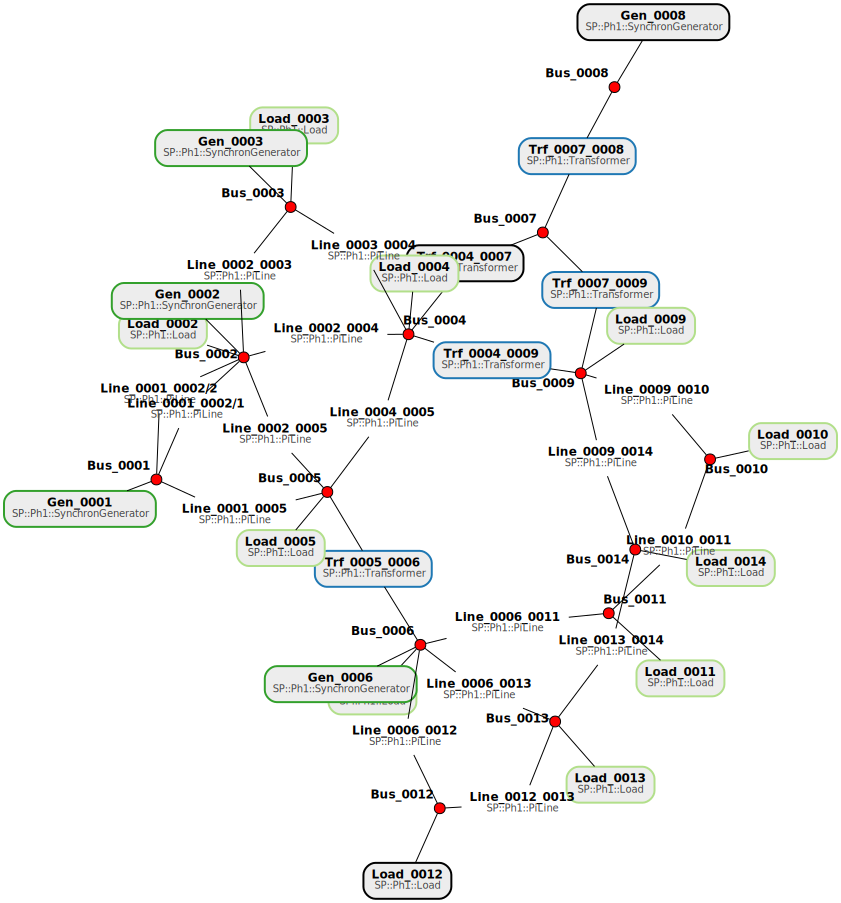

In [32]:
system_PF = CIM2DPsim.CIM2DPsim(imported_result, Domain.PF)
system_PF

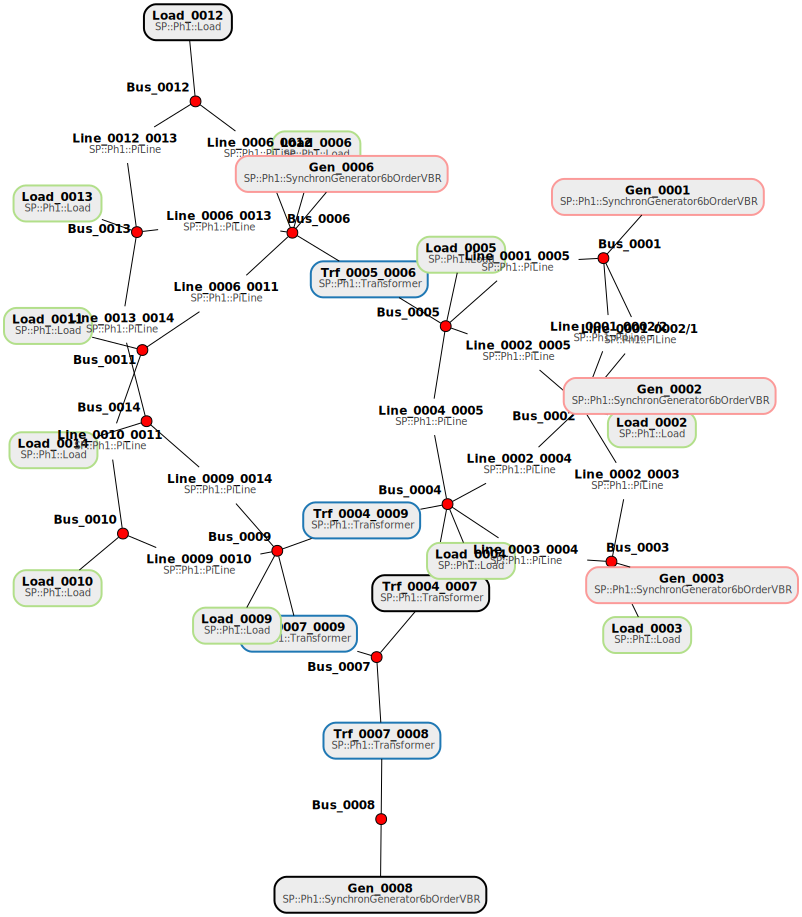

In [33]:
import dpsimpy
from cimpy.CIM2DPsim import SGModels
system_SP  = CIM2DPsim.CIM2DPsim(imported_result, Domain.SP, log_level=dpsimpy.LogLevel.debug, gen_model= SGModels.VBR_6Order)
system_SP

In [34]:
node = list(system_SP.components_at_node.keys())[0]
#system_SP.components_at_node[node] = []
system_SP.components_at_node[node]

In [35]:
for comp in system_SP.components:
    if "Line_0006_0013" == comp.name:
        print("HERE")
        print(len(system_SP.components))
        system_SP.components = [x for x in system_SP.components if x != comp]
        print(len(system_SP.components))

        for key, value in system_SP.components_at_node.items():
            if comp in value:
                obj_dict = system_SP.components_at_node
                print(len(system_SP.components_at_node[key]))
                obj_dict[key] = [c for c in obj_dict[key] if c != comp]
                system_SP.components_at_node = obj_dict
                print(len(system_SP.components_at_node[key]))

        

HERE
37
36
6
5
4
3


In [36]:
for comp in system_SP.components:
    if "L13-14" == comp.name:
        print("HERE")
        system_SP.components = [x for x in system_SP.components if x != comp]
        for node in system_SP.nodes:
            if node.name == "N14":
                print("Yes")
                print(system_SP.components_at_node[node])
                
                obj_dict = system_SP.components_at_node
                obj_dict[node] = [c for c in obj_dict[node] if c != comp]
                system_SP.components_at_node = obj_dict
                print(type(obj_dict))
                print(system_SP.components_at_node[node])
                
        


36


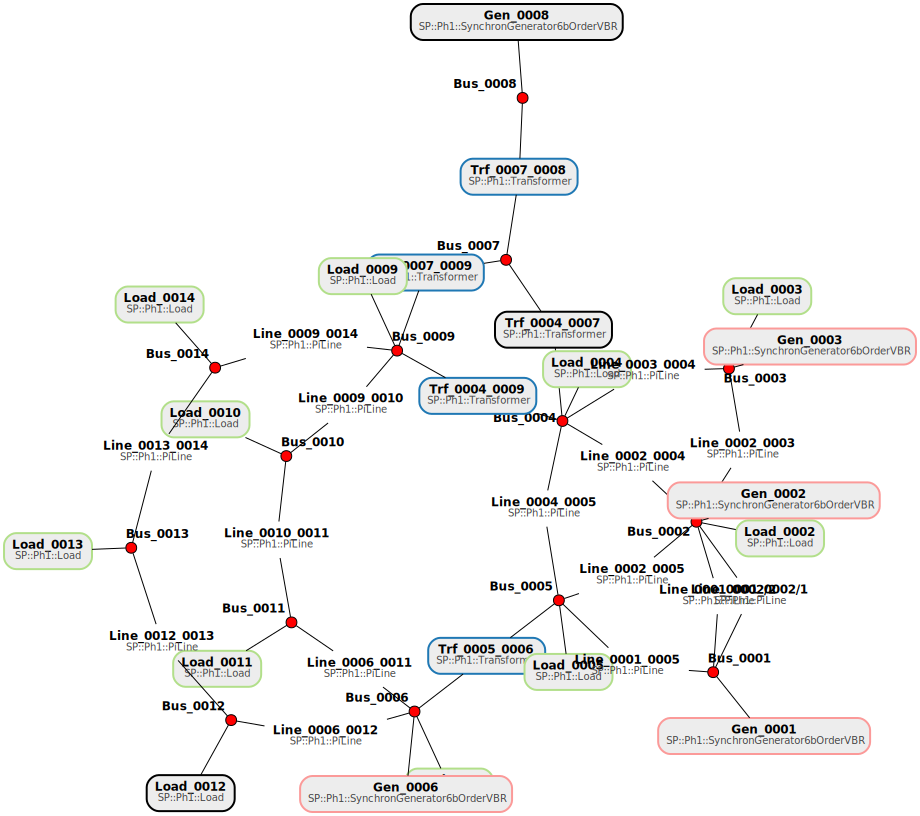

In [37]:

print(len(system_SP.components))
system_SP